## Setup Environment & Packages

In [1]:
#!pip install pandas numpy matplotlib seaborn scipy scikit-learn statsmodels

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('./assets/Social_Network_Ads.csv')

## Explore Dataset

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


## Plot

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Age vs Purchased')

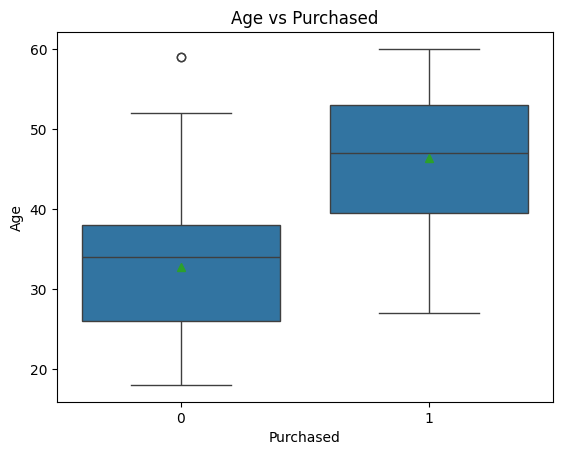

In [8]:
sns.boxplot(x='Purchased', y='Age', data=df, showmeans=True)
plt.title('Age vs Purchased')

In this boxplot, we can see that the range, mean & standard deviation are different for both classes of `Purchased` knowing the `Age`. This also means that the older someone is, the higher the chances for them to spend money.

Text(0.5, 1.0, 'EstimatedSalary vs Purchased')

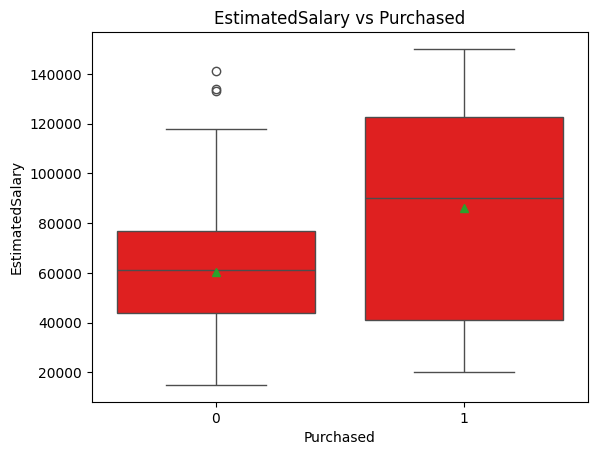

In [9]:
sns.boxplot(x='Purchased', y='EstimatedSalary', data=df, color="red", showmeans=True)
plt.title('EstimatedSalary vs Purchased')

Here, we see that the range, mean & standard deviation are also different for both classes. But, people who earn more than 80k$ tend to have a higher chance to purchase stuff.

## ANOVA test

In [10]:
from scipy import stats

In [11]:
anova_result = stats.f_oneway(df['EstimatedSalary'], df['Purchased'])
print(anova_result)

F_onewayResult(statistic=1673.4750185699197, pvalue=4.414001120303663e-198)


In [12]:
if anova_result[1] < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


We can see that the p-value is less than 0.05, so we reject the null hypothesis. This means that the EstimatedSalary of people who Purchase and those who don't are significantly different.

In [13]:
anova_result = stats.f_oneway(df['Age'], df['Purchased'])
print(anova_result)

F_onewayResult(statistic=5053.001227176278, pvalue=0.0)


In [14]:
if anova_result[1] < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


We cannot use Age and EstimatedSalary to predict Purchased

## Mosaic Plot of Gender

In [15]:
from statsmodels.graphics.mosaicplot import mosaic

Text(0.5, 1.0, 'Mosaic plot of Gender and Purchased')

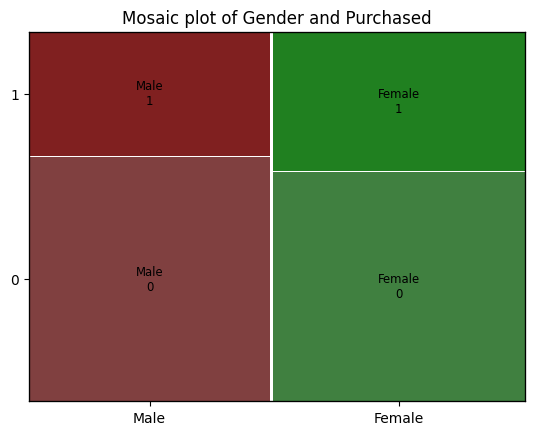

In [16]:
mosaic(df, ["Gender", "Purchased"])
plt.title('Mosaic plot of Gender and Purchased')

We notice that the `Gender` repartition is quite similar for all classes.

## Chi-square Test

In [17]:
from scipy.stats import chi2_contingency

In [18]:
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['Gender'], df['Purchased']))

In [19]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

p value is 0.45624659183130645
Independent (fail to reject H0)


As we fail to reject the null hypothesis, we can say that the variables are independent. Being a women or a man does not affect the purchase.

## Dataset Cleaning

We can remove `UserID` & `Gender`

In [20]:
df = df.drop(['User ID', 'Gender'], axis=1)

In [21]:
df.head()

,Age,EstimatedSalary,Purchased
0,19.0,19000.0,0
1,35.0,20000.0,0
2,26.0,43000.0,0
3,27.0,57000.0,0
4,19.0,76000.0,0


## Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = df.drop('Purchased', axis=1)
y = df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20200324)

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

In [27]:
pred_prob = classifier.predict_proba(X_test)[:, 1]

pred_class = (pred_prob >= 0.5).astype(int)

print('Predicted probabilities: \n', pred_prob[:5])
print('Predicted classes: \n', pred_class[:5])

Predicted probabilities: 
 [0.43040388 0.34699241 0.00388446 0.00766236 0.38787707]
Predicted classes: 
 [0 0 0 0 0]


The confusion matrix of our model

Text(50.722222222222214, 0.5, 'Actual')

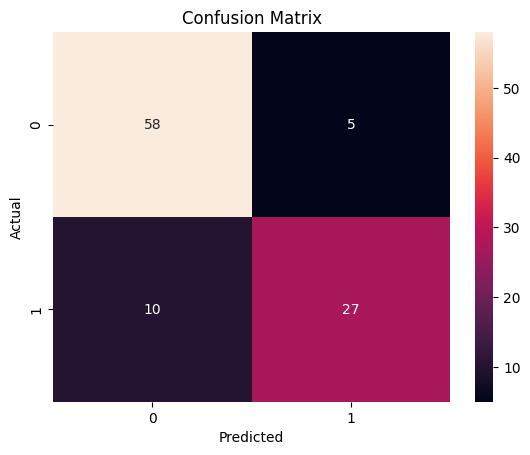

In [28]:
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

The logistic regression model has an accuracy of 85%, which indicates that it correctly predicted 85% of the instances. The precision of approximately 0.844 shows that when the model predicts class 1, it is correct about 84.4% of the time. The recall of approximately 0.730 indicates that the model correctly identifies 73% of the actual class 1 instances. The F1 Score of 0.783 provides a balance between precision and recall.

Another way of showing the confusion matrix

(<Figure size 640x480 with 3 Axes>,
 {('0', '0'): (0.0, 0.0, 0.6268656716417911, 0.9175763328587248),
  ('0', '1'): (0.0,
   0.9208985919949374,
   0.6268656716417911,
   0.07910140800506253),
  ('1', '0'): (0.6318407960199006,
   0.0,
   0.36815920398009955,
   0.2693723623956182),
  ('1', '1'): (0.6318407960199006,
   0.2726946215318308,
   0.36815920398009955,
   0.7273053784681691)})

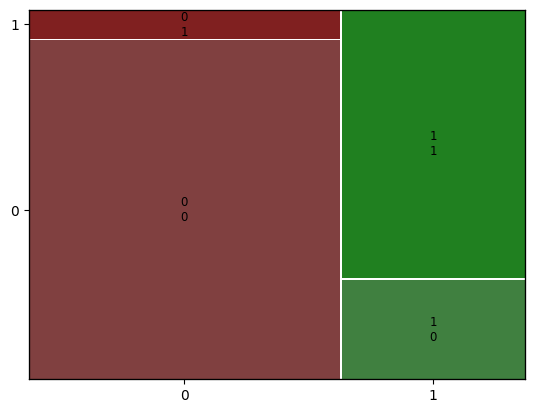

In [29]:
mosaic(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}), ['Actual', 'Predicted'])

AUC: 0.9236379236379236


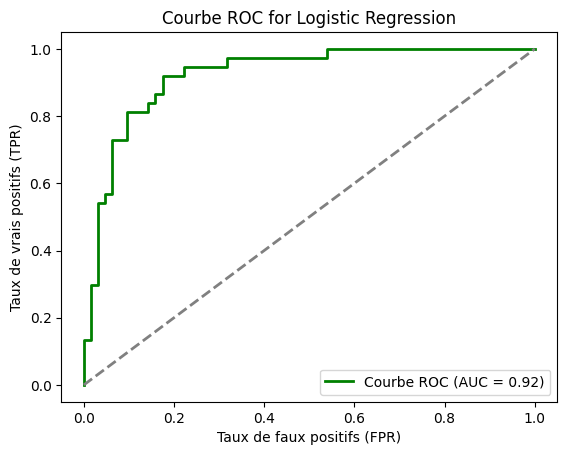

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

auc_classifier = roc_auc_score(y_test, pred_prob)
print("AUC:", auc_classifier)

fpr, tpr, _ = roc_curve(y_test, pred_prob)
roc_auc_classifier = auc(fpr, tpr)
plt.plot(fpr, tpr, color='green', lw=2, label='Courbe ROC (AUC = {:.2f})'.format(auc_classifier))
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

The curve is well above the diagonal line, which represents random guessing. This indicates that the model performs significantly better than random guessing. The closer the ROC curve is to the top-left corner, the better the model is at distinguishing between the positive and negative classes.

The area under the ROC curve (AUC) is 0.92, which is quite high. This suggests that the model has a high level of accuracy in distinguishing between classes. A higher AUC indicates better overall performance of the model, reflecting its ability to correctly predict both positive and negative classes.

## Linear Discriminant Analysis (LDA)

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

classifier_lda = LinearDiscriminantAnalysis()
classifier_lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [32]:
y_pred_lda = classifier_lda.predict(X_test)
y_pred_prob_lda = classifier_lda.predict_proba(X_test)[:, 1]

C:\Users\nicol\AppData\Local\Temp\ipykernel_16572\1314794109.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)


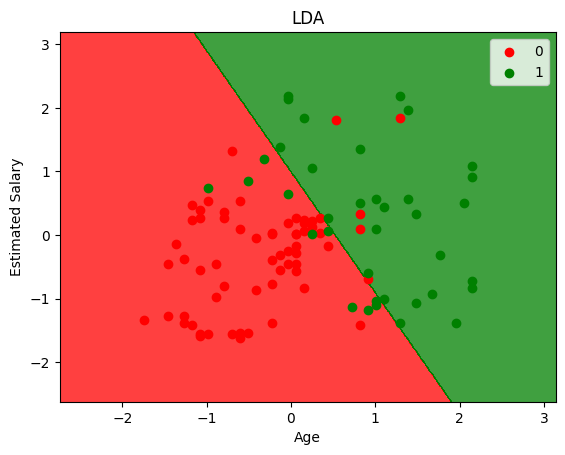

In [33]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                        np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier_lda.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('LDA')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Now, with the decision boundary, we can see that the model is able to separate the two classes quite well. Even though the model is not perfect, it is able to correctly predict most of the instances. We can tell that the number of red points in the green side is bigger than the number of green points in the red side. This means that the model tends to avoid minimize false positives.

Text(50.722222222222214, 0.5, 'Actual')

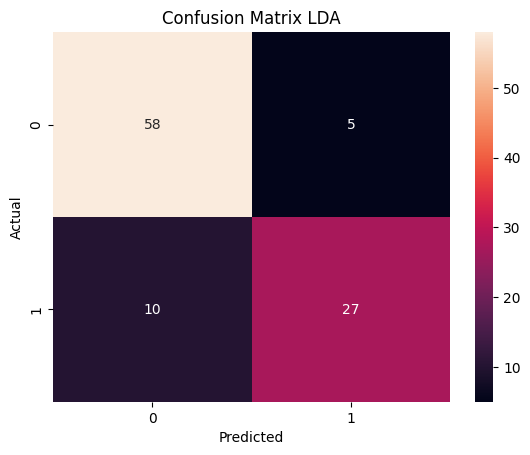

In [34]:
cm_lda = confusion_matrix(y_test, y_pred_lda)

sns.heatmap(cm_lda, annot=True, fmt="d")
plt.title('Confusion Matrix LDA')
plt.xlabel('Predicted')
plt.ylabel('Actual')

We can check what we saw with the decision boundary by looking at the confusion matrix. Here, the number of 0s being predicted as 1s is half the number of 1s being predicted as 0s. 

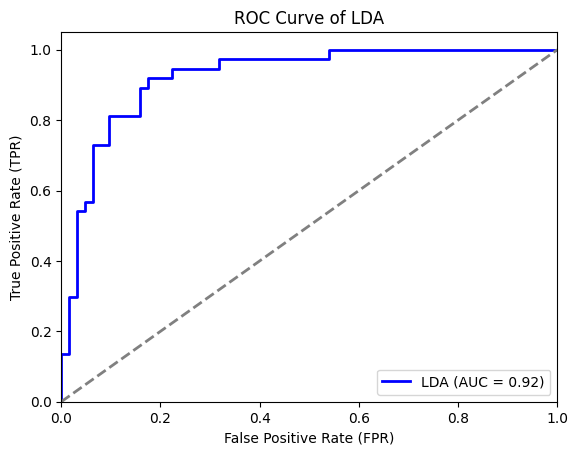

In [35]:
fpr_lda, tpr_lda, _ = roc_curve(y_test, y_pred_prob_lda)
roc_auc_lda = auc(fpr_lda, tpr_lda)

plt.figure()
plt.plot(fpr_lda, tpr_lda, color='blue', lw=2, label=f'LDA (AUC = {roc_auc_lda:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve of LDA')
plt.legend(loc='lower right')
plt.show()

This ROC curve is also above the diagonal line. However, we get similar results to the logistic regression model.

## Quadratic Discriminant Analysis (QDA)

In [36]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifier_qda = QuadraticDiscriminantAnalysis()
classifier_qda.fit(X_train, y_train)


QuadraticDiscriminantAnalysis()

In [37]:
y_pred_qda = classifier_qda.predict(X_test)
y_pred_prob_qda = classifier_qda.predict_proba(X_test)[:, 1]


C:\Users\nicol\AppData\Local\Temp\ipykernel_16572\2859026075.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)


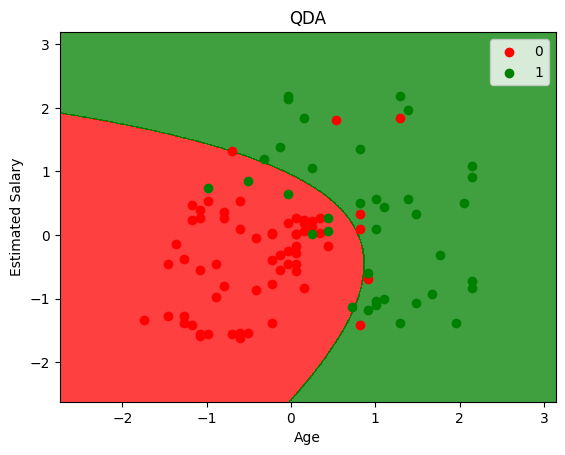

In [38]:
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                        np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier_qda.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha=0.75, cmap=ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('QDA')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Text(50.722222222222214, 0.5, 'Actual')

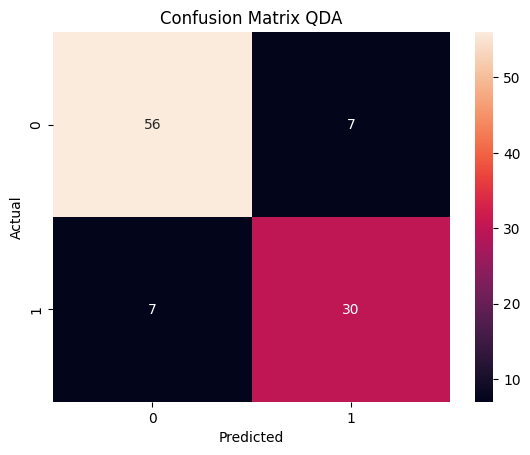

In [39]:
cm_qda = confusion_matrix(y_test, y_pred_qda)

sns.heatmap(cm_qda, annot=True, fmt="d")
plt.title('Confusion Matrix QDA')
plt.xlabel('Predicted')
plt.ylabel('Actual')


We have a deacrease in the number of false positives and an increase in the number of true positives. Which means that the model is better at predicting the positive class. Overall, the model is more balanced.

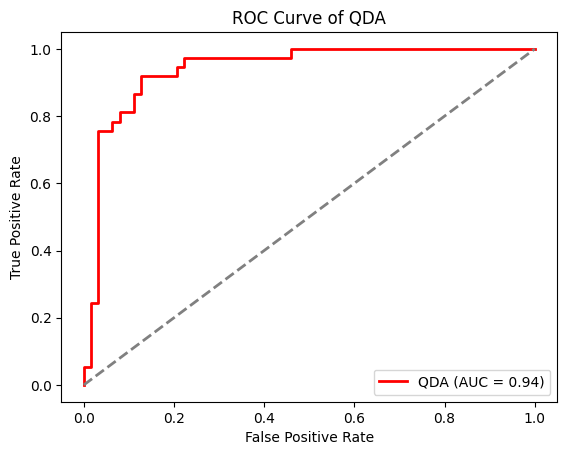

In [40]:
fpr_qda, tpr_qda, _ = roc_curve(y_test, y_pred_prob_qda)
roc_auc_qda = auc(fpr_qda, tpr_qda)

plt.figure()
plt.plot(fpr_qda, tpr_qda, color='red', lw=2, label=f'QDA (AUC = {roc_auc_qda:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of QDA')
plt.legend(loc="lower right")
plt.show()

As we have a higher degree using QDA than LDA (quadratic vs linear), it is easier to separate the two classes. The decision boundary is more complex, which allows the model to better distinguish between the two classes.

We get a higher AUC of 0.94, which is better than the logistic regression and LDA models. This indicates that the QDA model has a higher level of accuracy in distinguishing between classes.

## Comparison of Models

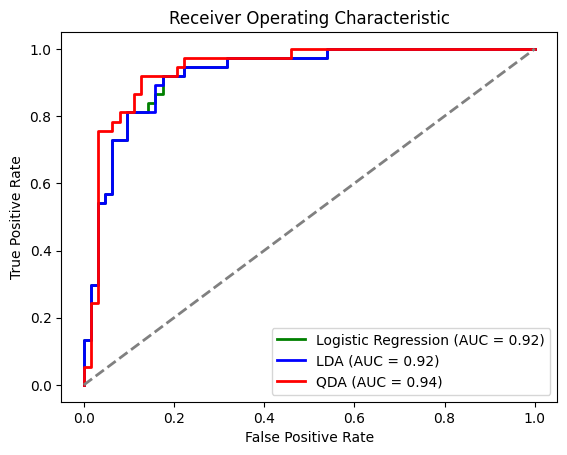

In [41]:
plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label=f'Logistic Regression (AUC = {roc_auc_classifier:.2f})')
plt.plot(fpr_lda, tpr_lda, color='blue', lw=2, label=f'LDA (AUC = {roc_auc_lda:.2f})')
plt.plot(fpr_qda, tpr_qda, color='red', lw=2, label=f'QDA (AUC = {roc_auc_qda:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


With this final plot, we can see that the QDA model is the best one. It has the highest AUC, which means that it has the best performance in distinguishing between classes.

## LDA From Scratch

In [42]:
to_keep = ['Age', 'EstimatedSalary']

train_df = pd.DataFrame(X_train, columns=to_keep)
train_df['Purchased'] = y_train

test_df = pd.DataFrame(X_test, columns=to_keep)
test_df['Purchased'] = y_test

µ is the mean of the feature for each class, Σ is the covariance matrix, and π is the prior probability of each class.

In [43]:
df_class1 = train_df[train_df['Purchased'] == 1]
df_class0 = train_df[train_df['Purchased'] == 0]

pi0 = len(df_class0) / len(train_df)
pi1 = len(df_class1) / len(train_df)

mu0 = df_class0[to_keep].mean()
mu1 = df_class1[to_keep].mean()

sigma0 = df_class0[to_keep].cov()
sigma1 = df_class1[to_keep].cov()

sigma = ((len(df_class0) / len(df)) * sigma0 + (len(df_class1) / len(df)) * sigma1) / (len(df)-2)

In [44]:
def delta_k(x, mu, sigma, pi):
    return x.T @ np.linalg.inv(sigma) @ mu - 0.5 * mu.T @ np.linalg.inv(sigma) @ mu + np.log(pi)

In [45]:
x = np.array([1,1.5])

delta_0 = delta_k(x, mu0, sigma, pi0)
delta_1 = delta_k(x, mu1, sigma, pi1)

delta_0, delta_1

(-26.616552471373225, -74.96632748043885)

In [46]:
def predict(x, mu0, mu1, sigma, pi0, pi1):
    y_pred = []
    for i in range(len(x)):
        delta0 = delta_k(x[i], mu0, sigma, pi0)
        delta1 = delta_k(x[i], mu1, sigma, pi1)
        y_pred.append(0 if delta0 > delta1 else 1)
    return y_pred

y_pred_scratch_lda = predict(X_test, mu0, mu1, sigma, pi0, pi1)

In [49]:
cm_lda_scratch = confusion_matrix(y_test, y_pred_scratch_lda)

Text(627.9949494949494, 0.5, 'Actual')

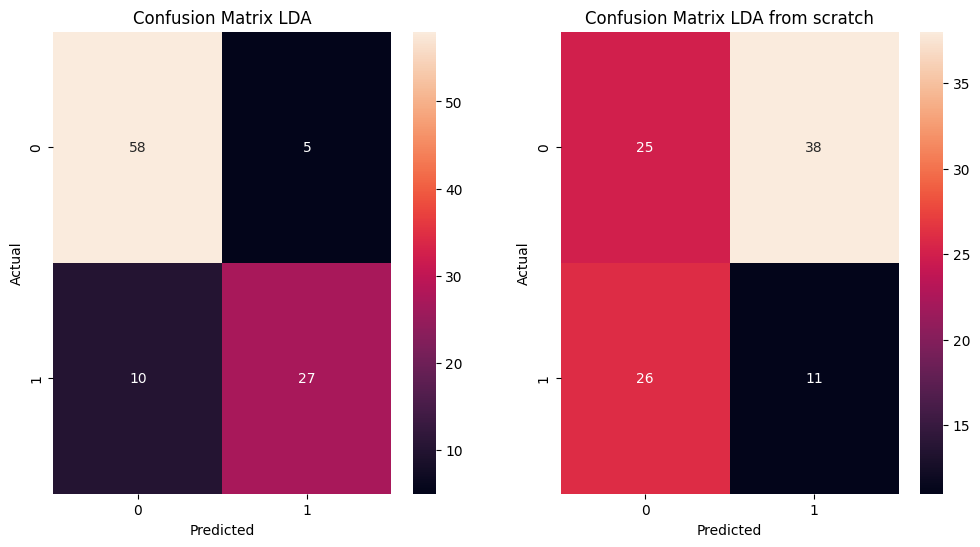

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(cm_lda, annot=True, fmt="d", ax=ax[0])
ax[0].set_title('Confusion Matrix LDA')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_lda_scratch, annot=True, fmt="d", ax=ax[1])
ax[1].set_title('Confusion Matrix LDA from scratch')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')


We can tell that the model from scratch is worse than the one from the library.